# Machine Learning Engineer Nanodegree
***
## Capstone Project
Monish Ananthu<br>
October 3rd, 2018<br>
***
## Energy Price Prediction
***

## I. Introduction

The Bundesnetzagentur's electricity market information platform "SMARD" is an abbreviation of the German term “Strommarktdaten”, which translates to electricity market data. Data that is published on SMARD’s website gives an up-to-date and in-depth overview of what is happening on the German electricity market.

How high is electricity supply and demand? How big is the share of electricity generated from renewable sources? How does electricity consumption change over the course of the day? How much electricity is imported into Germany and exported to its neighbours? SMARD's market data provides answers to these and many other questions

The SMARD Website offers real time data for analysis. This data is available for download in different formats.<br>
[Link to SMARD Website](https://www.smard.de/en)

The following electricity market data categories can be accessed/downloaded:

 - Electricity generation
     * Actual generation
     * Forecasted generation
     * Installed capacity     
<br>     
 - Electricity consumption
     * Realised consumption
     * Forecasted consumption
<br>


 - The market
     * Wholesale market price
     * Commercial exchanges
     * Physical flows     
<br>  

 - System stability
     * Balancing energy
     * Total costs
     * Primary balancing capacity
     * Secondary balancing capacity
     * Tertiary balancing reserve
     * Exported balancing energy
     * Imported balancing energy

The above data is available from 2015 onwards. The statistical data available is visuallized and limited to a specific subcategory (for example: Electricity generation --> Actual generation). The visualization does not convey how the data is correlated to one another and also the correlation of data between different catagories like "Actual generation" and "Wholesale market price" would be a very interesting to determine.

Both energy producers and consumers would profit from energy price predictions. Energy can be acquired by bidding on it and both parties producers and consumers have the goal of maximizing profits and reducing losses. Electricity is a valuable commodity  which needs to be consumed immediately as storing energy is a costly affair. Consumers profit from reduced prices to purchase electricity and producers profit from optimizing energy generation based on the predicted price to increase profits.

#### What makes SMARD Data so interesting?
 - Data is already consolidated from different transmission system operators in a standard format
 - High frequency of data (in 15 minute / hourly intervals) provides a good basis for data analysis
 - Data available from 2015 ist constantly updated
 
My personal motivation to choosing the analysis of german energy market data comes from my work in the field of electromobility. I'm a great fan of sustainability and electromobility would make sense only if we're able to produce more energy from renewable sources. But renewable energy comes at a price and expensive energy is contraproductive for consumers looking to embrace electromobility. This got me thinking deeper and I took it up as my capstone project to analyse the energy market data. The goal as we've seen is to use generation and consumption data simulating demand and supply to predict the price for a combination of demand and supply. 

After some research I have come across several attempts to predict energy prices.<br>
1) [A Comparative Study of Different Machine LearningMethods for Electricity Prices Forecasting of an Electricity Market](https://www.researchgate.net/publication/282250672_A_Comparative_Study_of_Different_Machine_Learning_Methods_for_Electricity_Prices_Forecasting_of_an_Electricity_Market)<br>
2) [Forecasting day ahead electricity prices in Europe](https://ac.els-cdn.com/S0306261917316999/1-s2.0-S0306261917316999-main.pdf?_tid=163a3320-4362-45ca-b979-300481ec5d1c&acdnat=1540837518_1c64917ccea34a96720342f96cfdaf08)<br>

It is interesting to see that both attempts use Deep Learning for prediction. I intend to use supervised learning regression methods to solve the problem.

## II. Problem Statement

The problem to be solved is the prediction of the wholesale market price of energy [Euro/MWh] using the data available above. The problem at hand is a supervised learning problem in the field of Machine Learning. We have the following input data:

a. Actual generation<br>
b. Realized Consumption<br>
c. Balancing energy<br>

It is important to find correlations among the above input features and use this information to predict the wholesale market price of energy.

We will discuss the data available in detail in the **Analysis and Preprocessing** section below. Our strategy for arriving at a solution to the above problem comprises of the the following steps:

1. **Data Preparation** - Data first needs to be collected and pre-screened for relevance and completeness. The the data can be visualized to check for relationships between different variables and outliers. The data may also need to be normalized and scaled. This data is split into training and testing sets. We will use the majority of the data for training and evaluate model performance later on using the testing set.
<br>
2. **Model Selection & Experimentation** - There are many models available for regression. We will try different models in this step and choose the model with the best prediction.
<br>
3. **Model Training** - In the data prepraration step we already split the data set into Training and testing set. We will use the training data set to train the model. If necessary we also can use a subset of dat for cross validation, to make sure the model doesn't overfit.
<br>
4. **Model Evaluation** - In this step we feed the trained model data it hasn't seen before and evaluate how good the prediction is.
<br>
5. **Model Parameter Tuning** - Once we know how a chosen model is performing, we can take a look at the model parameters for possibilities to increase prediction rate. The Grid Search technique is a useful tool to determine the best parameters.
<br>
6. **Prediction** - We have chosen a model and tuned it to our problem. This is the final step which helps us fullfill our problem statement.

All data used for analysis is available in CSV format

The data sets can be downloaded at <br>
[https://www.smard.de/en/downloadcenter/download_market_data](Link)<br>
Select category, sub-category, country = Germany, Dates: 01/01/2015 - 31/12/2015,<br> Filetype: CSV and download file.

We will consider a Data sets for the years 2015 and 2016.

**Metrics**

The problem we've addressed is 

 - Supervised Learning problem: Input features like Generation, Consumption data are known and we also have a target variable Energy Price we are trying to predict
 
 - Regression based problem: Prediction of a specific value i.e. Energy price

For the above Regression problem, we have the choice of the following metrics:

- Mean Absolute Error (MAE)
- Mean Square Error / Root Mean Square Error (RMSE)
- R squared Error
- Adjusted R squared Error

**Mean Absolute Error (MAE)**

Mean Absolute Error is the average error for a set of predictions. The absolute value of the differences in the predictions and the actual value is considered [8]. 
The mathematical of MAE can be represented as 

\begin{equation*}
MAE = \frac{1}{n}\sum_{j=1}^n|y_j - \hat y_j|
\end{equation*}


**Root Mean Squared Error**

Root Mean squared Error is the square root of the average of squared differences between prediction and actual observation [8]
The mathematical representation is as follows:


\begin{equation*}
RMSE = \sqrt{\frac{1}{n}\sum_{j=1}^n(y_j - \hat y_j)^2}
\end{equation*}


**R Squared Error**

According to Wikipedia, "R2 is also the square of the correlation (correlation written as a “p” or “rho”) between the actual and predicted outcomes".

\begin{equation*}
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
\end{equation*}

Sum of squares of residuals

\begin{equation*}
SS_{res} = \sum_i(y_i - f_i)^2 = \sum_i e_i^2
\end{equation*}

Total sum of squares

\begin{equation*}
SS_{res} = \sum_i(y_i - \bar y)^2
\end{equation*}

**Adjusted R Squared**

According to [], _Adjusted R squared is a modified version of R Squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases only if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance. The adjusted R-squared can be negative, but it’s usually not.  It is always lower than the R-squared._
<br>
<br>
<br>
__For the regression problem, my choice of metric is the Root Mean Square Error (Error)__

Both Mean Absolute Error and Root mean squared error are expressed in the same unit of the variable to be predicted. R squared on the other hand is scaled between 0 and 1. If R squared value approaches closer to 1, we know that the prediction is very close to the actual outcome. The prediction does not relate to actual outcome if the value is closer to 0.

In our case choosing R squared gives us an indirect interpretation of the reliablity of the prediction. It does not tell us how much we have swayed in our prediction. However, when we consider RMSE we have the error rate in the same unit as the target variable which provides us with a direct comparision to judge how good the model is doing.



## III. Analysis and Preprocessing

The subcategories below refer to feature sets. The feature sets can be obtained by selection of the relevant category and sub category and downloading the data as explained in the Problem Statement. If a sub-category is not relevant, all features in the feature set can be discarded. Partial relevance means that a part of the the features need to be considered.


|        Category        |    Sub-category   | Relevant? | Data frequency |          Details                  |
|------------------------|-------------------|-----------|----------------|-----------|----------------------------------|
| Electricity <br>generation | Actual <br>generation |    yes    |    15 mins     | Amount of energy generated<br> by different sources<br> at a specific time period|
|                        | <font color='red'>Forecasted <br>generation</font> | <font color='red'>no</font> | <font color='red'>15 mins</font> | <font color='red'>Forecasted features <br>are not relevant</font>|
|                        | <font color='red'>Installed<br> Capacity</font> |<font color='red'>no</font>|<font color='red'>NA</font>| <font color='red'>Not enough data</font>|
| Electricity<br> consumption | Realized <br>consumption |    yes    |    15 mins     | Energy consumption at <br>specific time period|
|                         | <font color='red'>Forecasted <br>consumption</font> | <font color='red'>no</font>|<font color='red'>15 mins</font> | <font color='red'>Forecasted features are <br> not relevant</font> |
| The Market | Wholesale <br>market price |yes <br>(partially)|15 mins| Energy price per MWh. <br> Only data for Germany <br>is relevant|
|            | <font color='red'>Commercial <br>exchanges</font> |<font color='red'>no</font>|<font color='red'>60 mins</font>|<font color='red'>Energy Imports and Exports <br> are out of scope for <br>price prediction</font>|
|            |<font color='red'>Physical <br>flows</font>|<font color='red'>no</font>|<font color='red'>60 mins</font>|<font color='red'>Energy Imports and Exports are <br>out of scope for price prediction</font>|
| System stability | Balancing<br> energy |    yes    |    15 mins     | Overall energy balancing <br>volumes and balancing <br> price|
|                  | <font color='red'>Total costs</font>  |<font color='red'>no</font>|<font color='red'>monthly</font>|<font color='red'>Not enough data</font>|
|                  |<font color='red'>Primary<br> balancing capacity</font> |<font color='red'>no</font>|<font color='red'>15 mins</font>|<font color='red'>Energy balancing efforts<br> and resulting costs <br>are not in scope</font>|
|                  | <font color='red'>Secondary<br> bancing capacity</font> |<font color='red'>no</font>|<font color='red'>15 mins</font>|<font color='red'>Energy balancing efforts<br> and resulting costs<br> are not in scope</font>|
|                  |<font color='red'>Tertiary<br> balancing reserve</font> |<font color='red'>no</font>|<font color='red'>15 mins</font>| <font color='red'>Energy balancing efforts<br> and resulting costs <br>are not in scope</font>|
|                  | <font color='red'>Exported <br>balancing energy</font>|<font color='red'>no</font>|<font color='red'>NA</font>|<font color='red'>No data available<br> for 2015</font>|
|                  | <font color='red'>Imported<br> balancing energy</font>|<font color='red'>no</font>|<font color='red'>NA</font>|<font color='red'>No data available<br> for 2015</font>|

<br>
After the initial screening we have the following features:
<br>

|        Category        |    Sub-category   | Feature | Data frequency |Comments|
|------------------------|-------------------|-----------|----------------|-----------|
| | | Date | | Date starting<br> 01/01/2015 - 31/12/2015 |
| | | Time of day | | Timestamps in 15 min<br> intervals for the date<br> range specified above |
| Electricity <br>generation | Actual <br>generation | Hydropower[MWh]| 15 mins| Generated energy<br> in MWh |
|  |  | Wind offshore[MWh] |    15 mins     | Generated energy<br> in MWh |
|  |  | Wind onshore[MWh] |    15 mins     | Generated energy<br> in MWh |
|  |  | Photovoltaics[MWh] |    15 mins     | Generated energy<br> in MWh |
|  |  | Other <br>renewable[MWh] |    15 mins     | Generated energy<br> in MWh |
|  |  | Nuclear[MWh] |    15 mins     | Generated energy<br> in MWh |
|  |  | Fossil brown <br>coal[MWh] |    15 mins     | Generated energy<br> in MWh |
|  |  | Fossil hard <br>coal[MWh] |    15 mins     | Generated energy<br> in MWh |
|  |  | Fossil gas[MWh] |    15 mins     | Generated energy<br> in MWh |
|  |  | Hydro pumped <br>storage[MWh] |    15 mins     | Generated energy<br> in MWh |
|  |  | Other <br>conventional[MWh] |    15 mins     | Generated energy<br> in MWh |
| Electricity <br>consumption  | Actual <br>consumption | Total[MWh] | 15 mins | Feature name needs<br> to be modified to Total<br> consumption for simplicity |
| The Market | Wholesale <br>market price | Germany/<br>Austria/<br>Luxembourg<br>[Euro/MWh] | 60 mins | Market prices of other<br> countries are not relevant<br> and need not be considered.<br> The feature name will be <br>renamed to Price Germany <br>for simplicity |
| System <br>stability | Balancing <br>energy  | Balancing energy<br> volume[MWh] | 15 mins | Balancing energy<br> in MWh |
|  |  | Balancing energy<br> price[Euro/MWh] | 15 mins | Price for balancing<br> energy Euro/MWh |

Each of the features in the dataset contains a value for a particular time period/interval. The feature we like to predict "Wholesale market price" is available every 60 minutes. This implies that the input features which are currently available every 15 minutes need to be reduced to once every 60 minutes to correspond with the predicted feature.

**Why is this data set relevant for the problem?**

From the information presented in [2], we see clearly

#### <font color='blue'>The electricity market brings supply and demand together.</font>
#### <font color='blue'>The main element to control the market is the Price.</font>

We already have supply data i.e. energy supply data from different sources and demand data which is the consumption data. We also have the energy price for any give time period. If supply and demand are key factors which influence the price, we already have the relevant data to analyse using Supervised Machine Learning.

In [1]:
# coding=utf-8

In [2]:
# Import necessary libraries
import source_data_helper as sc
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import preprocessing

%matplotlib inline

#### Read CSV Data

We start by reading data which have a frequency of 15 mins:

1. Actual generation
2. Actual consumption
3. Balancing energy


In [3]:
cwd = os.getcwd()
source_path = os.path.join(cwd, 'datasets', '2015-2017')

# Read all csv data with a time series frequency of 15 mins. data_freq_15min is a list of dataframes
data_freq_15min = sc.read_multiple_csv(source_path, ['DE_Actual generation_2015-2017.csv', 
                                                     'DE_Actual consumption_2015-2017.csv',
                                                     'DE_Balancing energy_2015-2017.csv'])

dataset has 70271 samples with 14 features each.
dataset has 70271 samples with 3 features each.
dataset has 70271 samples with 4 features each.


Using the function "read_multiple_csv", each csv file with features recorded on a 15 minute basis is read into a dataframe. These dataframes are saved into a list 'data_frew_15min' to group features with a 15 minute frequency. As we have observed earlier there exist other features based on hourly frequency. We need to handle data with different time frequencies separately before we merge them later on.

**Actual generation** (Frequency = 15 mins)

we find the data from 'DE_Actual_generation_2015-2017.csv' which we read into a dataframe as seen below. The amount of energy in MWh(Megawatt hour) from different energy sources for each time period is listed.

In [4]:
data_freq_15min[0].head()

,Date,Time of day,Biomass[MWh],Hydropower[MWh],Wind offshore[MWh],Wind onshore[MWh],Photovoltaics[MWh],Other renewable[MWh],Nuclear[MWh],Fossil brown coal[MWh],Fossil hard coal[MWh],Fossil gas[MWh],Hydro pumped storage[MWh],Other conventional[MWh]
0,2015-01-01,12:00 AM,1005.50,288.25,130.00,2028.25,0.0,14.5,2685.50,3976.25,686.00,263.00,192.50,1521.75
1,2015-01-01,12:15 AM,1007.00,287.75,129.25,2023.00,0.0,14.5,2646.25,3963.25,721.25,261.75,149.75,1498.00
2,2015-01-01,12:30 AM,1006.50,292.75,128.50,2040.25,0.0,14.5,2660.75,3924.75,695.75,260.50,173.25,1503.25
3,2015-01-01,12:45 AM,1005.25,289.50,128.75,2036.50,0.0,14.5,2718.00,3871.75,664.75,241.50,95.00,1518.75
4,2015-01-01,1:00 AM,998.75,295.25,128.75,2045.75,0.0,14.5,2772.25,3899.00,520.50,202.25,67.50,1491.75


For better readability, we convert all headers to lowercase, get rid of spaces and square brackets.

In [5]:
# Fix column names with Whitespaces and Uppercases
data_freq_15min[0].columns = data_freq_15min[0].columns.str.strip().str.lower().str.replace(' ', '_').
                                str.replace('(', '').str.replace(')', '').str.replace('[', '_').str.replace(']', '')
data_freq_15min[0].head()

,date,time_of_day,biomass_mwh,hydropower_mwh,wind_offshore_mwh,wind_onshore_mwh,photovoltaics_mwh,other_renewable_mwh,nuclear_mwh,fossil_brown_coal_mwh,fossil_hard_coal_mwh,fossil_gas_mwh,hydro_pumped_storage_mwh,other_conventional_mwh
0,2015-01-01,12:00 AM,1005.50,288.25,130.00,2028.25,0.0,14.5,2685.50,3976.25,686.00,263.00,192.50,1521.75
1,2015-01-01,12:15 AM,1007.00,287.75,129.25,2023.00,0.0,14.5,2646.25,3963.25,721.25,261.75,149.75,1498.00
2,2015-01-01,12:30 AM,1006.50,292.75,128.50,2040.25,0.0,14.5,2660.75,3924.75,695.75,260.50,173.25,1503.25
3,2015-01-01,12:45 AM,1005.25,289.50,128.75,2036.50,0.0,14.5,2718.00,3871.75,664.75,241.50,95.00,1518.75
4,2015-01-01,1:00 AM,998.75,295.25,128.75,2045.75,0.0,14.5,2772.25,3899.00,520.50,202.25,67.50,1491.75


 **Actual consumption** (Frequency = 15 mins)
 
we find the data from 'DE_Actual_consumption_2015-2017.csv' which we read into a dataframe as seen below. The amount of energy consumed in MWh(Megawatt hour) for each time period is listed.

In [6]:
data_freq_15min[1].head()

,Date,Time of day,Total[MWh]
0,2015-01-01,12:00 AM,10606.25
1,2015-01-01,12:15 AM,10505.25
2,2015-01-01,12:30 AM,10517.00
3,2015-01-01,12:45 AM,10468.50
4,2015-01-01,1:00 AM,10307.50


For better readability, we convert all headers to lowercase, get rid of spaces and square brackets.

In [7]:
# Fix column names with Whitespaces and Uppercases
data_freq_15min[1].columns = data_freq_15min[1].columns.str.strip().str.lower().str.replace(' ', '_').
                                str.replace('(', '').str.replace(')', '').str.replace('[', '_').str.replace(']', '')

**Balancing energy** (Frequency = 15 mins)

we find the data from 'DE_Balancing energy_2015-2017.csv' which we read into a dataframe as seen below. The amount of balancing energy in MWh(Megawatt hour) and the balancing energy price Euro/MWh for each time period is listed.

In [8]:
data_freq_15min[2].head()

,Date,Time of day,Balancing energy volume[MWh],Balancing energy price[Euro/MWh]
0,2015-01-01,12:00 AM,-475.0,-49.41
1,2015-01-01,12:15 AM,-181.0,-19.69
2,2015-01-01,12:30 AM,154.0,74.70
3,2015-01-01,12:45 AM,137.0,62.28
4,2015-01-01,1:00 AM,463.0,63.71


In [9]:
# Fix column names with Whitespaces and Uppercases
data_freq_15min[2].columns = data_freq_15min[2].columns.str.strip().str.lower().str.replace(' ', '_').
                                str.replace('(', '').str.replace(')', '').str.replace('[', '_').str.replace(']', '')

**Wholesale market price** (Frequency = 60 mins)

Wholesale market price/Day ahead price has a frequency of 60 mins. Therfore, we will read this data separately to merge them later with the 15 min data set, which will be reduced to a frequency of 60 minutes.

In [10]:
prices_freq_60min = sc.read_csv(os.path.join(source_path,
                                             "DE_Day-ahead prices_2015-2017.csv"))

dataset has 17568 samples with 14 features each.


In [11]:
prices_freq_60min.head()

,Date,Time of day,Germany/Austria/Luxembourg[Euro/MWh],Denmark 1[Euro/MWh],Denmark 2[Euro/MWh],France[Euro/MWh],Northern Italy[Euro/MWh],Netherlands[Euro/MWh],Poland[Euro/MWh],Sweden 4[Euro/MWh],Switzerland[Euro/MWh],Slovenia[Euro/MWh],Czech Republic[Euro/MWh],Hungary[Euro/MWh]
0,2015-01-01,12:00 AM,NaN,25.02,27.38,NaN,NaN,NaN,NaN,27.38,44.94,27.30,26.48,45.07
1,2015-01-01,1:00 AM,NaN,18.29,18.29,NaN,NaN,NaN,NaN,23.37,43.43,23.25,24.20,44.16
2,2015-01-01,2:00 AM,NaN,16.04,16.04,NaN,NaN,NaN,NaN,19.33,38.08,22.20,22.06,39.17
3,2015-01-01,3:00 AM,NaN,14.60,14.60,NaN,NaN,NaN,NaN,17.66,35.47,19.56,20.27,26.93
4,2015-01-01,4:00 AM,NaN,14.95,14.95,NaN,NaN,NaN,NaN,17.53,30.83,18.88,19.17,20.94


In [12]:
# Fix column names with Whitespaces and Uppercases
prices_freq_60min.columns = prices_freq_60min.columns.str.strip().str.lower().str.replace(' ', '_').
                                str.replace('(', '').str.replace(')', '').str.replace('[', '_').str.replace(']', '')

**Challenges faced during Preprocessing**
 - From the above representations we have features which are available to us in different time intervals. Some features are recorded every 15 minutes and others every 60 minutes. For analysis, the basis for time frequency needs to be the same across all the features. A 15 minute frequency is not possible as we already have data missing for features which have been recorded on an hourly basis. Hence, we need to reduce the features with a 15 minute frequency to an hourly basis i.e. 60 minutes
 - During the process of reducing features, feature names become unreadable when the context is missing. These features need to be renamed to something more understandable
 - Some Regression techniques like Light GBM Regressor encounter processing problems when square brackets are present in feature names 

**Reduce frequency of all features to 60 minutes and merge to a single data set**

We feed all fatures with a 15 min frequency to the function _convert__multiple__to__hourly_. This function retains hourly data and deletes the rest of the entries. Now we have the same number of entries with the same time periods as the hourly basis.<br>
'data_freq_60min' is now a list of dataframes which have been converted to contain entries on an hourly basis.

In [13]:
data_freq_60min = sc.convert_multiple_to_hourly(data_freq_15min)

Modified dataset has 17568 samples with 14 features each.
Modified dataset has 17568 samples with 3 features each.
Modified dataset has 17568 samples with 4 features each.


In [14]:
# view reduced data for actual generation
data_freq_60min[0].head()

,date,time_of_day,biomass_mwh,hydropower_mwh,wind_offshore_mwh,wind_onshore_mwh,photovoltaics_mwh,other_renewable_mwh,nuclear_mwh,fossil_brown_coal_mwh,fossil_hard_coal_mwh,fossil_gas_mwh,hydro_pumped_storage_mwh,other_conventional_mwh
0,2015-01-01,12:00 AM,1005.50,288.25,130.00,2028.25,0.0,14.5,2685.50,3976.25,686.00,263.00,192.50,1521.75
1,2015-01-01,1:00 AM,998.75,295.25,128.75,2045.75,0.0,14.5,2772.25,3899.00,520.50,202.25,67.50,1491.75
2,2015-01-01,2:00 AM,1001.00,293.25,129.00,2134.50,0.0,14.5,2774.00,3774.50,449.25,101.00,167.00,1480.25
3,2015-01-01,3:00 AM,1008.00,284.25,128.50,2149.50,0.0,14.5,2759.25,3574.00,483.50,101.00,136.50,1537.00
4,2015-01-01,4:00 AM,1008.75,279.25,129.75,2184.00,0.0,14.5,2766.50,3540.25,469.50,101.25,142.25,1476.00


We now extend the list of converted hourly dataframes to rest of the hourly dataset dataframes which was not processed until now. <br> 
'data_freq_60min' is a list containing all converted hourly dataframes. What is now missing is a master dataframe with all features consolidated together.

In [15]:
# join new dataframes list with the previous join to get master dataframe
data_freq_60min.extend([prices_freq_60min])

We use the an inner join to join all dataframes in the list 'data_freq_60min' to create one single dataframe based on the timestamps available. We will name this new dataframe 'master_data'.

In [16]:
# Merge all dataframes in the list iteratively with keys= date, time_of_day
master_data = sc.join(data_freq_60min)

Unrelevant Columns will now be dropped.

In [17]:
# Columns containing price data for other countries are not relevant for the current problem. Drop them
master_data.drop(['denmark_1_euro/mwh','denmark_2_euro/mwh', 'france_euro/mwh',
                  'northern_italy_euro/mwh', 'netherlands_euro/mwh', 'poland_euro/mwh',
                  'sweden_4_euro/mwh', 'switzerland_euro/mwh', 'slovenia_euro/mwh',
                  'czech_republic_euro/mwh', 'hungary_euro/mwh'], 1, inplace=True, errors='ignore')

Certain columns will be renamed to increase readability.

In [18]:
# Rename columns for better readability
master_data.rename(columns={'total_mwh': 'total_consumption_mwh', 
                            'germany/austria/luxembourg_euro/mwh': 'price_germany_euro/mwh'}
                               , inplace=True)

# Dataset characteristics
print("Number of instances in dataset = {}".format(master_data.shape[0]))
print("Total number of columns = {}".format(master_data.columns.shape[0]))
# List number of null values pro Feature
print("Column wise count of null values:-")
print(master_data.isnull().sum())

Number of instances in dataset = 17596
Total number of columns = 18
Column wise count of null values:-
date                                  0
time_of_day                           0
biomass_mwh                         203
hydropower_mwh                      135
wind_offshore_mwh                   113
wind_onshore_mwh                    117
photovoltaics_mwh                   146
other_renewable_mwh                 212
nuclear_mwh                          96
fossil_brown_coal_mwh               196
fossil_hard_coal_mwh                168
fossil_gas_mwh                      150
hydro_pumped_storage_mwh            121
other_conventional_mwh             1017
total_consumption_mwh                 0
balancing_energy_volume_mwh           0
balancing_energy_price_euro/mwh       0
price_germany_euro/mwh              120
dtype: int64


As we can see above, 12 features contain missing or NaN values. Let us explore the data in detail to determine how to deal with NaNs.

### Data Exploration

We have 4 types of data and we have to explore them separately.

a. Actual generation - contains values of individual energy sources<br>
b. Realized Consumption - total energy consumption (Germany)<br>
c. Balancing energy - Energy required for balancing and price Euro/Mwh<br>
d. Wholesale energy price - target variable<br>

We will now group relevant features with common characteristics using the above labels for easier analysis.

In [19]:
# columns for actual generation
actual_generation = ['biomass_mwh','hydropower_mwh','wind_offshore_mwh',
                     'wind_onshore_mwh','photovoltaics_mwh','other_renewable_mwh',
                     'nuclear_mwh','fossil_brown_coal_mwh','fossil_hard_coal_mwh',
                     'fossil_gas_mwh','hydro_pumped_storage_mwh', 'other_conventional_mwh']

#actual_consumption = ['50hz_consumption','amprion_consumption','tennet_consumption','transnetbw_consumption']
actual_consumption = ['total_consumption_mwh']

balancing_energy = ['balancing_energy_volume_mwh','balancing_energy_price_euro/mwh']

target = ['price_germany_euro/mwh']

In [20]:
master_data[actual_generation].describe()

,biomass_mwh,hydropower_mwh,wind_offshore_mwh,wind_onshore_mwh,photovoltaics_mwh,other_renewable_mwh,nuclear_mwh,fossil_brown_coal_mwh,fossil_hard_coal_mwh,fossil_gas_mwh,hydro_pumped_storage_mwh,other_conventional_mwh
count,17393.000000,17461.000000,17483.000000,17479.000000,17450.000000,17384.000000,17500.000000,17400.000000,17428.000000,17446.000000,17475.000000,16579.000000
mean,1059.656126,453.039030,285.107447,1907.624707,985.667722,23.507248,2345.017114,3762.063707,2337.405899,362.094334,175.073462,1437.941764
std,89.666552,128.472593,231.897884,1606.903028,1511.748379,15.589565,360.398637,576.352412,1231.525012,311.543847,226.936886,609.139779
min,660.500000,202.250000,0.000000,28.000000,0.000000,6.500000,1130.500000,1332.500000,103.750000,7.250000,0.000000,174.750000
25%,986.250000,354.250000,85.750000,726.250000,0.000000,16.250000,2156.250000,3453.000000,1250.062500,153.312500,1.250000,1021.750000
50%,1080.250000,423.750000,210.250000,1412.250000,17.250000,25.000000,2457.000000,3836.750000,2393.125000,235.125000,74.500000,1334.500000
75%,1147.000000,530.750000,481.750000,2616.250000,1579.000000,27.750000,2630.250000,4186.500000,3350.562500,455.187500,275.000000,1716.750000
max,1206.000000,785.250000,915.500000,7738.250000,6563.000000,518.250000,2868.500000,4807.500000,5169.500000,2364.750000,1598.250000,8127.500000


Actual generation depicts real time energy generation data. If we have missing values here, it implies that the particular energy source did not produce energy for the time period. We can replace the missing values with 0s.

We also notice that the mean and median values of the different features vary to a large extent. Hence, in a later stage we should scale our data.

In [21]:
# Fill missing values with zeros
master_data['biomass_mwh'].fillna(0,inplace=True)
master_data['hydropower_mwh'].fillna(0,inplace=True)
master_data['wind_offshore_mwh'].fillna(0,inplace=True)
master_data['wind_onshore_mwh'].fillna(0,inplace=True)
master_data['photovoltaics_mwh'].fillna(0,inplace=True)
master_data['other_renewable_mwh'].fillna(0,inplace=True)
master_data['nuclear_mwh'].fillna(0,inplace=True)
master_data['fossil_brown_coal_mwh'].fillna(0,inplace=True)
master_data['fossil_hard_coal_mwh'].fillna(0,inplace=True)
master_data['fossil_gas_mwh'].fillna(0,inplace=True)
master_data['hydro_pumped_storage_mwh'].fillna(0,inplace=True)
master_data['other_conventional_mwh'].fillna(0,inplace=True)

### Data Visualization

#### 1. Detecting yearly patterns


As the data is spread over 2 years, we visualize the data to discover yearly patterns.

Text(0.5,1,'fossil_brown_coal_mwh')

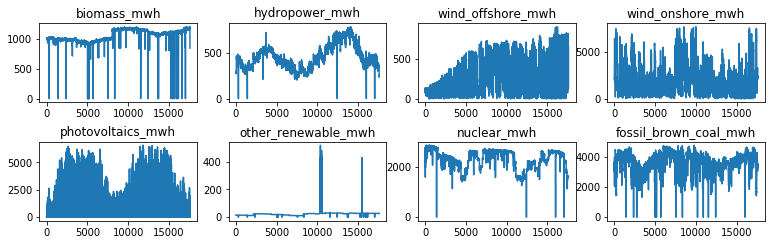

In [22]:
# Plot actual generation
fig = plt.figure(figsize=(13,8))
fig.subplots_adjust(hspace=.5)

plt.subplot(4,4,1)
master_data['biomass_mwh'].plot()
plt.title('biomass_mwh')

plt.subplot(4,4,2)
master_data['hydropower_mwh'].plot()
plt.title('hydropower_mwh')

plt.subplot(4,4,3)
master_data['wind_offshore_mwh'].plot()
plt.title('wind_offshore_mwh')

plt.subplot(4,4,4)
master_data['wind_onshore_mwh'].plot()
plt.title('wind_onshore_mwh')

plt.subplot(4,4,5)
master_data['photovoltaics_mwh'].plot()
plt.title('photovoltaics_mwh')

plt.subplot(4,4,6)
master_data['other_renewable_mwh'].plot()
plt.title('other_renewable_mwh')

plt.subplot(4,4,7)
master_data['nuclear_mwh'].plot()
plt.title('nuclear_mwh')

plt.subplot(4,4,8)
master_data['fossil_brown_coal_mwh'].plot()
plt.title('fossil_brown_coal_mwh')


Text(0.5,1,'other_conventional_mwh')

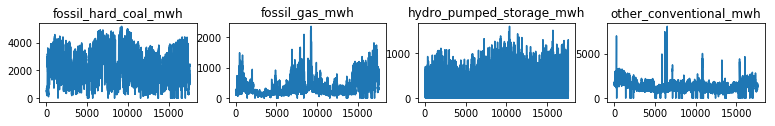

In [23]:
fig = plt.figure(figsize=(13,8))
fig.subplots_adjust(hspace=.5)

plt.subplot(4,4,9)
master_data['fossil_hard_coal_mwh'].plot()
plt.title('fossil_hard_coal_mwh')

plt.subplot(4,4,10)
master_data['fossil_gas_mwh'].plot()
plt.title('fossil_gas_mwh')

plt.subplot(4,4,11)
master_data['hydro_pumped_storage_mwh'].plot()
plt.title('hydro_pumped_storage_mwh')

plt.subplot(4,4,12)
master_data['other_conventional_mwh'].plot()
plt.title('other_conventional_mwh')

We currently have 17596 hourly dataset rows over a persiod of 2 years 2015-2016 and 2016-2017 i.e. 8798 per year. 

Looking at the above data we can observe that non-renewable sources of energy have a pattern which can be predicted if we were to divide the graphs right in the middle. This is true for nuclear, fossil brown coal, fossil hard coal, fossil gas, hydro pumped storage and other conventional energy sources.

The same is not consistent for renewable sources. Wind energy is weather dependent which does not have set patterns. If we observe biomass and hydropower, they reflect similar patterns but in varying sizes. This could be a result of increasing yearly investments in these energy sources. Photovoltaics appears to be consistent with a predictable pattern.

In [24]:
master_data[actual_consumption].describe()

,total_consumption_mwh
count,17596.000000
mean,13663.896255
std,2477.577389
min,7856.750000
25%,11586.750000
50%,13582.500000
75%,15906.437500
max,18975.250000


The mean and median of 'total_consumption_mwh' varies to a large extent when compared to features grouped under 'actual_generation'. Scaling is therefore necessary.

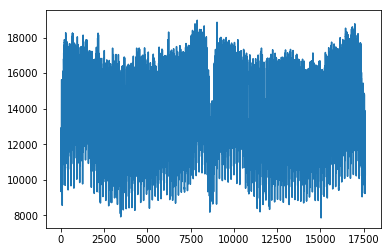

In [25]:
master_data['total_consumption_mwh'].plot()

The consumption data for the second year seems to follow a similar pattern as the first year. This implies that the energy consumption for a certain time of year is consistent to the previous year.

In [26]:
master_data[balancing_energy].describe()

,balancing_energy_volume_mwh,balancing_energy_price_euro/mwh
count,17596.000000,17596.000000
mean,165.372471,31.917856
std,464.695247,150.874693
min,-3210.000000,-5997.420000
25%,-102.250000,1.890000
50%,160.000000,39.940000
75%,437.000000,60.882500
max,3271.000000,5824.630000


Similar to 'total_consumption_mwh', Data Scaling is also required.

Text(0.5,1,'balancing_energy_price_euro/mwh')

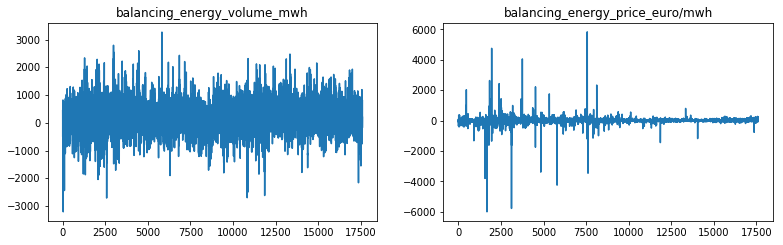

In [27]:
fig = plt.figure(figsize=(13,8))

plt.subplot(2,2,1)
master_data['balancing_energy_volume_mwh'].plot()
plt.title('balancing_energy_volume_mwh')

plt.subplot(2,2,2)
master_data['balancing_energy_price_euro/mwh'].plot()
plt.title('balancing_energy_price_euro/mwh')

The balancing energy volume contains a consistent yearly pattern. This does not apply to the balancing energy price which appears more random.

In [28]:
master_data[target].describe()

,price_germany_euro/mwh
count,17476.000000
mean,30.386641
std,12.551637
min,-130.090000
25%,23.460000
50%,29.660000
75%,37.060000
max,104.960000


We still have 120 missing values for **price_germany**. The reason for missing values could be an error in the logging system. In other cases if we look at the data above, we notice negative values. In certain rare periods particularly at the end of the year, there is a such a surplus of wind energy produced that the prices go below zero i.e the consumer gets paid for consuming energy. In the energy market, there is always supply and demand and hence, a price for each time period. Earlier for energy generation we replaced all missing values with zeroes. The case here is different and a price of zero has a false implication and would have a negative influence on the prediction.

The best strategy here would be to either use the Median or the mean.

<font color='blue'>Median = 29.66</font> <br>
<font color='blue'>Mean = 30.386641</font> <br>

Since there isn't a large difference between Median and Mean, let us consider the Mean value to fill the missing values

In [29]:
master_data['price_germany_euro/mwh'].fillna(master_data['price_germany_euro/mwh']
                                             .mean(),inplace=True)

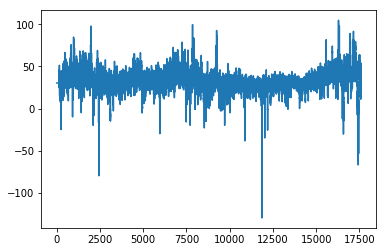

In [30]:
master_data['price_germany_euro/mwh'].plot()

From the above figure we can observe a pattern with a lot of activity at start and end of the year. As the year proceeds, it appears more constant. The pattern cannot be reproduced the next year 100% but the tendency and value ranges remain the same. Moreover, pricing is a complex issue which not only depends on demand and supply but other factors which we haven't considered in our case. One factor could be the increase of investment every year in renewable energies increasing output but also at the same time making renewable energy expensive in the initial phases.

Since the machine learning models cannot handle timeseries data, we will delete time related data like 'date' and 'time_of_day', however perserving the order of recorded data as the order of data is essential for training a supervised regression model for time series.

In [31]:
# Drop date and time 
master_data.drop(['date','time_of_day'], axis=1, inplace=True)

Our final list of features can be seen below.

In [32]:
list(master_data)

['biomass_mwh',
 'hydropower_mwh',
 'wind_offshore_mwh',
 'wind_onshore_mwh',
 'photovoltaics_mwh',
 'other_renewable_mwh',
 'nuclear_mwh',
 'fossil_brown_coal_mwh',
 'fossil_hard_coal_mwh',
 'fossil_gas_mwh',
 'hydro_pumped_storage_mwh',
 'other_conventional_mwh',
 'total_consumption_mwh',
 'balancing_energy_volume_mwh',
 'balancing_energy_price_euro/mwh',
 'price_germany_euro/mwh']

#### 2. Linear correlation among input features and target variable

In the scatter plots below, we attempt to find linear correlations between the input features and the target variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000ACE81D0>,
      dtype=object)

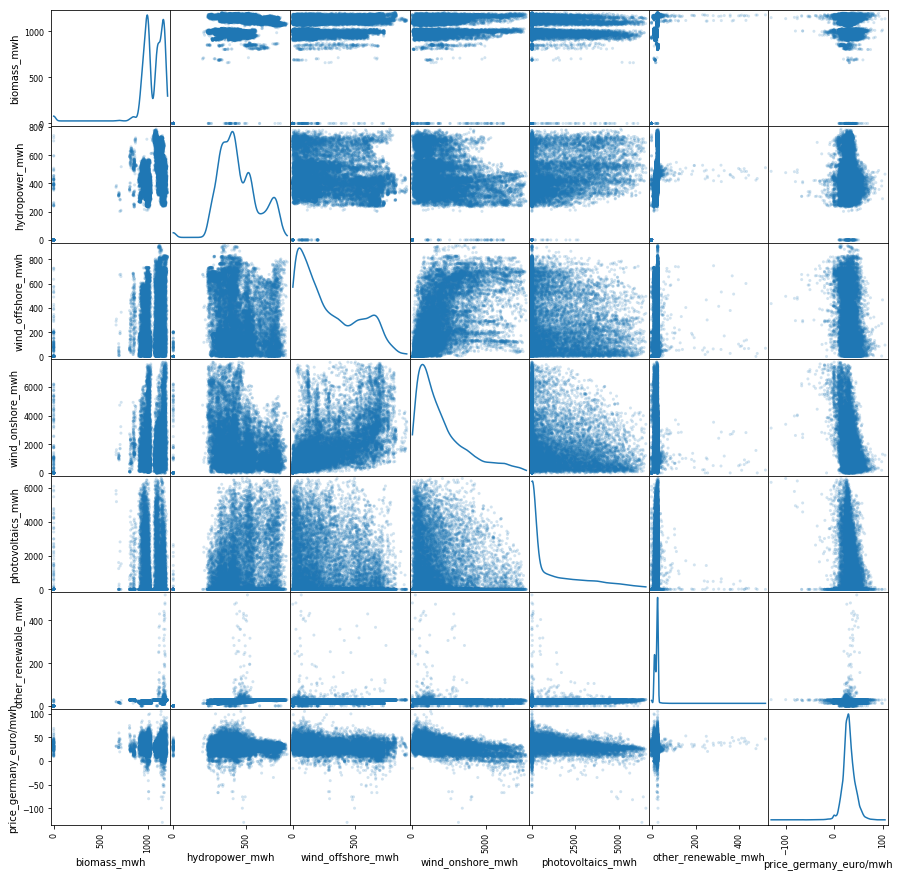

In [33]:
from pandas.plotting import scatter_matrix
scatter_matrix(master_data[['biomass_mwh','hydropower_mwh','wind_offshore_mwh',
                            'wind_onshore_mwh','photovoltaics_mwh','other_renewable_mwh'
                            ,'price_germany_euro/mwh']], alpha=0.2, figsize=(15,15), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CAD04E0>,
      dtype=object)

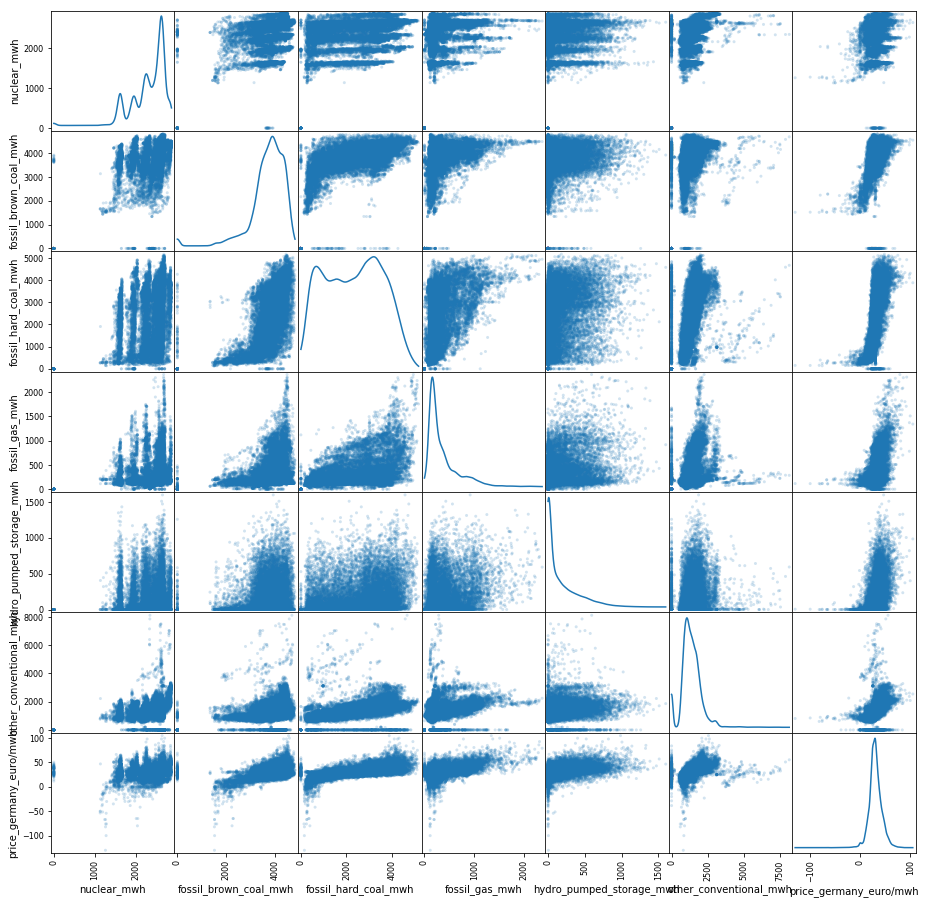

In [34]:
scatter_matrix(master_data[['nuclear_mwh','fossil_brown_coal_mwh','fossil_hard_coal_mwh',
                     'fossil_gas_mwh','hydro_pumped_storage_mwh', 'other_conventional_mwh',
                            'price_germany_euro/mwh']], alpha=0.2, figsize=(15.5,15.5), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000106F5860>,
      dtype=object)

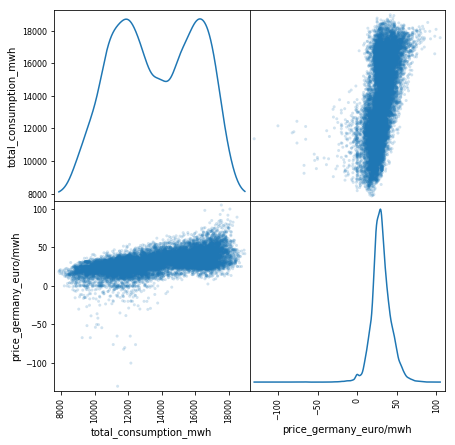

In [35]:
scatter_matrix(master_data[['total_consumption_mwh','price_germany_euro/mwh']],
               alpha=0.2, figsize=(7,7), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010BCBB70>,
      dtype=object)

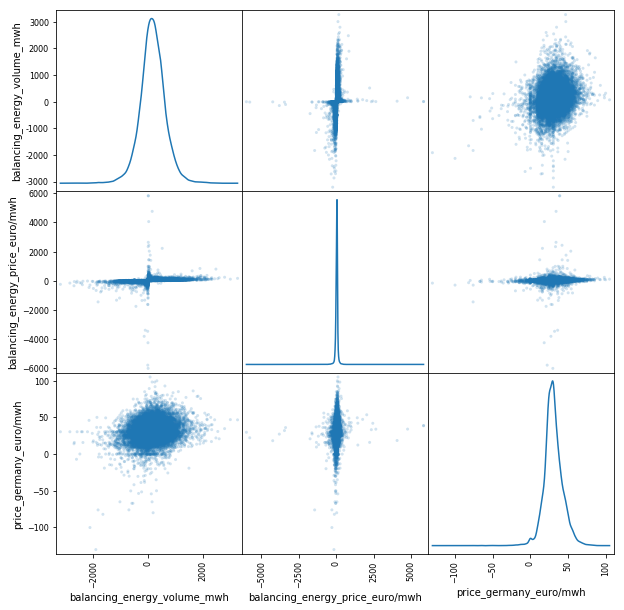

In [36]:
scatter_matrix(master_data[['balancing_energy_volume_mwh','balancing_energy_price_euro/mwh',
                            'price_germany_euro/mwh']], alpha=0.2, figsize=(10,10), diagonal='kde')

As we can observe we cannot identify a direct linear correlation between the input features and the target variable.

### Outlier Detection and Elimination

Using Tukey's method of Outlier detection [], we look for datasets which are 1.5 times below the 1st quartile (25th percentile) and 1.5 times above the 3rd quartile (75th percentile) and delete them from the master dataset.

In [37]:
temp_frame = master_data.copy()
# get only source features for scaling
x_features = ['biomass_mwh','hydropower_mwh','wind_offshore_mwh','wind_onshore_mwh',
              'photovoltaics_mwh','other_renewable_mwh','nuclear_mwh',
              'fossil_brown_coal_mwh','fossil_hard_coal_mwh','fossil_gas_mwh',
              'hydro_pumped_storage_mwh','other_conventional_mwh','total_consumption_mwh',
              'balancing_energy_volume_mwh']

In [38]:
from collections import Counter

out_counter = Counter()


# For each feature find the data points with extreme high or low values
for index,feature in temp_frame[x_features].T.iterrows():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(feature,25)

    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(feature,75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1)*1.5
    
    # Display the outliers
    new_data = temp_frame[~((temp_frame[index] >= Q1 - step) 
                            & (temp_frame[index] <= Q3 + step))]

    for index in new_data.index.get_values():
        #print(index)
        out_counter[index] += 1
        
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [list(out_counter.elements())]

print (f'Detected {len(list(set(out_counter.elements())))} Outliers')

Detected 5326 Outliers


In [39]:
# Remove the outliers, if any were specified
temp_frame.drop(temp_frame.index[outliers], axis=0, inplace=True)
print(f'{len(temp_frame)} data sets after outlier removal')

12270 data sets after outlier removal


### Feature Scaling

From our data analysis we observed that each of the features are on a different scale. There are significant differences in the mean values of each of the individual features. We cannot use this data to train the machine learning model without scaling them. In our case, we will use the MinMaxScaler to scale all the features as some features also include negative values. The values will be scaled between -1 and 1 [5].

In [40]:
# Drop 'balancing_energy_price_euro/mwh' based on domain knowledge as this feature is not required
y = temp_frame['price_germany_euro/mwh']
X = temp_frame.drop(['price_germany_euro/mwh',
                     'balancing_energy_price_euro/mwh'], axis=1)

# Use MinMaxScaler to scale
scaler = preprocessing.MinMaxScaler()

X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['biomass_mwh','hydropower_mwh','wind_offshore_mwh',
                             'wind_onshore_mwh','photovoltaics_mwh','other_renewable_mwh',
                             'nuclear_mwh','fossil_brown_coal_mwh','fossil_hard_coal_mwh',
                             'fossil_gas_mwh','hydro_pumped_storage_mwh','other_conventional_mwh',
                             'total_consumption_mwh','balancing_energy_volume_mwh'])

### Avoiding Look ahead bias and cross validation for the energy Time Series data set

The available data set is a time series data set on an hourly basis. Regular cross validation methods like kfold, holdout are not appropriate due to the look ahead bias they generate. Considering the current time 't', we are predicting data for a future time period 't + n', where x is the difference in time to reach the target time for our prediction. Here it is important to not use future data for out training set. We need a special function 'TimeSeriesSplit' to generate training and testing data sets without look forward bias. 'TimeSeriesSplit' ensures that the future data is always used as the test set for prediction to simulate learning under real conditions.

## Benchmark Model

Since energy price prediction is a classic regression problem, we will start with Linear Regression as our benchmark model.

In [41]:
# import relevant libraries
from sklearn.model_selection import TimeSeriesSplit
from sklearn import metrics, preprocessing
from sklearn.preprocessing import MinMaxScaler
import time

In [42]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Perform Linear Regression using TimeSeriesSplit
l_tscv = TimeSeriesSplit(n_splits=200)
l_cv = l_tscv.split(X)

l_reg = LinearRegression()
train_list = []
test_list = []
rmse_list = []

# set start time
start = time.time()

# generate train and test indices and train each set
for train_index, test_index in l_cv:
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    l_reg.fit(X_train,y_train)
    y_pred = l_reg.predict(X_test)
    train_score = l_reg.score(X_train,y_train)
    test_score = l_reg.score(X_test,y_test)
    train_list.append(train_score)
    test_list.append(test_score)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    rmse_list.append(rmse)

# set end time
end = time.time()

print("Average RMSE Score = ",np.mean(rmse_list))
print("Average Train Prediction Accuracy =",np.mean(train_list))
print("Average Test Prediction Accuracy =",np.mean(test_list))
print("Execution time: ",end - start)

Average RMSE Score =  4.953005879681328
Average Train Prediction Accuracy = 0.758279100701416
Average Test Prediction Accuracy = 0.4243483359932581
Execution time:  0.7720000743865967


### Considered Regression Models for prediction
<br>

For the Regression problem we have considered Linear Regression as our benchmark for analysis. The benchmark model will serve as a basis for comparing results with other models. During the preprocessing phase, certain non relevant features were dropped, outliers removed and data was scaled. With Linear Regression as our benchmark, we have chosen the most simple model for a supervised learning regression problem. Supervised Learning offers óther regression models, each of them conceptionally different and complex when compared to Linear Regression. So our approach here is to try different Regression models on the problem at hand to find the best model which fits our data. Once this model is identified, we will optimize this model later.

__Regularized versions of Linear Regression__ 

Ridge and Lasso Regressions improve on simple Linear Regression to make sure the data doesn't overfit.

__1) Ridge__<br> 

Ridge Regression performs L2 Regularization i.e. the model penalizes error by adding the sum of the squares of the coefficients to the error. Ridge Regression is used to reduce multicollinearity in multiple regression data.
Multicollinearity is the existence of near-linear relationships among independent variables.

The cost function for a Ridge Regression [12] can be denoted by:

\begin{equation*}
min({||Y - X(\theta)||}_2^2 + \lambda {||\theta||}_2^2)
\end{equation*}

lambda is used to control the penalty term. The bigger the alpha value, the more we penalize the model and the magnitude of the coefficients are reduced.

Ridge Regression can be used:
 - to reduce multicollinearity
 - to reduce model complexity by shrinking the coefficients
 - on data that are equally distributed
 - when no feature selection is necessary
 - for operations which require computational eficiency
 
__2) Lasso__<br>

Lasso Regression performs L1 Regularization i.e. the model penalizes error by adding the absolute values of the coefficients to the error. Mathematically, Lasso is similar Ridge regression. Instead of adding the squares of theta, we will add the absolute value of theta.

The cost function for a Lasso Regression [12] can be denoted by:

\begin{equation*}
min({||Y - X(\theta)||}_2^2 + \lambda {||\theta||}_1)
\end{equation*}

Lasso Regression can be used:
 - only for sparse data which require computational efficiency
 - feature selection. All non relevant columns are converted directly to noise


__Ensemble models__

Ensemble models refer to different models which are put together to achieve a better results compared to traditional models. Therer are 2 different strategies used for ensemble methods:

 - Bagging: Predictions are made by averaging the results of different estimators which execute in parallel. In Bagging, a certain number of estimators are built using small samples taken from the data (using sampling with replacement). Finally the results are pooled and the estimates are obtained by averaging the results. The algorithms to be used for training can be chosen. Here ist is recommended to use weak learners or simply an algorithm that performs poorly i.e. just above the baseline for the current problem. Weak learners can be trained more faster than other complex algorithms. Though weak in prediction, when combined, they usually achieve comparable or better performance than more sophisticated single algorithms[13].<br>
 <br>
 - Boosting: Predictions are made by using a weighted average of sequential aggregated estimators. A sequence of weak learners(for example, single level decision trees) are fit on reweighted versions of the data. Weights are assigned based on the predictability of the case. Cases that are more difficult are weighted more. The idea is that the trees first learn easy examples and then concentrate on the more difficult ones. In the end, the sequence of weak learners is weighted to maximize overall performance[13].

__3) Random Forest Regression__<br>
   Random Forests are based on bagging, but operates only using binary split decision trees, which are left to grow to 
   their extremes. Moreover, it samples the cases to be used in each of its models using bootstrapping. As the tree is grown, at each split of a branch, the set of variables to be considered for the split is drawn randomly,too. Ensemble trees, that due to different samples and considered variables at splits are very different than each other. Being different they are also uncorrelated. This is beneficial because when the results are ensembled, much variance is ruled out as in a mean extreme values on both sides in a distribution tend to balance each other. In other words, bagging algorithms such as Random Forest guarantee a certain level of diversity in the predictions, allowing for developing rules that a single learner (such as decision tree) might never come across[13].

__4) Gradient Boosting Regression__<br>
   Gradient Boosting is an improved version of boosting based on a gradient descent function. Gradient Boosting is nore sensible to noise and is computationally expensive due to the nonparallel operations.


__Gradient Boosted Decision Tree__

__5) XGBoost Regression__<br>
   XGBoost stands for eXtreme Gradient Boosting and is a new generation Gradient Boosting Algorithm. XGBoost has the      following advantages[13]:
   - sparse-aware algorithm: it can leverage sparse matrices, saving both memory and computation time
   - approximate tree learning which bears similar results but in much less time than the classical complete explorations of possible branch cuts
   - parallel computing on a single machine (using multi threading in the phase of search for best split) and similarly distributed computations on multiple ones
   - out-of-core computations on a single machine leveraging a data storage solution called column block. This arranges data on disk by columns, thus saving time by pulling data from the disk as the optimization algorithm (which works on column vectors) expects it.
   - XGBoost can also deal with missing data in an effective way. Ensembles based on standard decision trees require missing data first to be imputed using an off-scale value, such as a negative number, in order to develop an appropriate branching of the tree to deal with missing values. XGBoost instead fits all the non-missing values. After having created the branching for the variable, it decides which branch is better for the missing values to take in order to minimize the prediction error. Such an approach leads to both trees that are more compact and an effective im putation starategy, leading to more predictive power.
  
__Tree Based Gradient Boosting__

__6) LightGBM Regression__<br>
   XGBoost has many advantages over classical ensemble methods but at the same time takes a long time to train. This is what motivated an open source team at Microsoft to create a high performance Gradient Boosting algorithm called LightGBM. Though LightGBM is based on decision trees like XGBoost, it follows a different strategy. Whereas XGBoost uses decision trees to split on a variable and exploring different cuts at that variable, LightGBM concentrates on a split and goes on splitting from there in order to achieve a better fitting (leaf wise tree growth strategy). This allows LightGBM to fit frist and fast a good fit of the data, and to generate alternative solutions compared to XGBoost[13]. <br>
   
   Some Highlights of LightGBM are shown below:
   - More complex trees due to a leaf wise strategy which increases prediction but at the same time with a higher risk of overfitting
   - Faster on larger datasets
   - Can leverage parallelization and GPU and can therfore be scaled on even larger problems
   - LighGBM is not heavy on memory as it doesnt store and handles continous variables as they are, but it turns them into discrete bins of values.

### Build Data Pipeline

In the following lines of code, we will build a pipeline for different estimators which will run on our prepared dataset. We have covered the estimators which we have considered for the pipeline above. We will use time series cross validation to split data into n=70 cross validation data sets and runs each estimator in the pipeline on the cross validation data sets. During execution, the following metrics will be measured:
1. Root mean squared error (RMSE)
2. Train time - time required to train the model
3. Train score - model prediction score for training set
4. Test score - model prediction score for test set.

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import preprocessing
import lightgbm as lgb
from lightgbm.sklearn import LGBMRegressor
from xgboost.sklearn import XGBRegressor
import xgboost as xgb
from matplotlib import pyplot

In [44]:
# result lists

# simple pipeline function to run mutiple regression models sequentially
def run_pipeline(estimators, splits, X, y):
    perf_summary = []
    for est in estimators:
        tscv = TimeSeriesSplit(n_splits = splits)
        cv = tscv.split(X)
        # Initialize regressor
        perf = execute_regressor(est,X,y,cv)
        #print(perf)
        perf_summary.append(perf)
    return perf_summary

# function to execute a specific regression model provided earlier in the pipeline
def execute_regressor(reg, X, y, cv, **kwargs):
    reg_perf = {}
    rmse_l = []
    train_l = []
    test_l = []
        
    # record start
    start = time.time()
    
    regressor = reg(**kwargs)
        
    for train_index, test_index in cv:
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        regressor.fit(X_train,y_train)
        y_pred = regressor.predict(X_test)
        train_score = regressor.score(X_train,y_train)
        test_score = regressor.score(X_test,y_test)
        train_l.append(train_score)
        test_l.append(test_score)
        rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
        rmse_list.append(rmse) 
    
    #record end time
    end = time.time()
    
    reg_perf["name"] = reg.__name__
    reg_perf["train_time"] = end - start
    reg_perf["train_score"] = np.mean(train_l)
    reg_perf["test_score"] = np.mean(test_l)
    reg_perf["rmse"] = np.mean(rmse_list)
    return reg_perf

The choice of 70 as the value for the number of time series cross validation splits was based on manual trial and error as sklearn does not provide a technical possibility to optimize this parameter. Based on the best resulting test scores using different split values, we found 70 as an optimal value, similar to 200 splits used in the benchmark model. The advantage of 70 splits is that it takes less time for the estimator pipeline to execute with the same, if not better prediction accuracy when compared to 200 splits.

In [45]:
# define regression functions
estimators = [Ridge, Lasso, RandomForestRegressor, SVR, 
              GradientBoostingRegressor, LGBMRegressor, XGBRegressor]
# Run pipeline and get performance of regressors
perf_list = run_pipeline(estimators, 70, X, y)

In the below lines of code, we create a dataframe from the pipeline results list for easier visualization.

In [46]:
# Construct dataframe from dictionary list
model_summary = pd.DataFrame.from_dict(perf_list)
model_summary.rename(index={0:'Ridge',1:'Lasso', 2:'Random Forest',
                            3:'SVR', 4:'Gradient Boosting', 5:'LGBM',
                            6:'XGBoost'}, inplace=True)
model_summary

,name,rmse,test_score,train_score,train_time
Ridge,Ridge,4.976745,0.511779,0.758339,0.268
Lasso,Lasso,5.529965,-0.008370,0.292662,0.260
Random Forest,RandomForestRegressor,5.401900,0.596863,0.972212,39.046
SVR,SVR,5.387532,0.486393,0.701419,259.357
Gradient Boosting,GradientBoostingRegressor,5.260943,0.649664,0.883455,40.815
LGBM,LGBMRegressor,5.150525,0.679183,0.953913,20.458
XGBoost,XGBRegressor,5.070604,0.655381,0.882269,33.593


Text(0,0.5,'rmse')

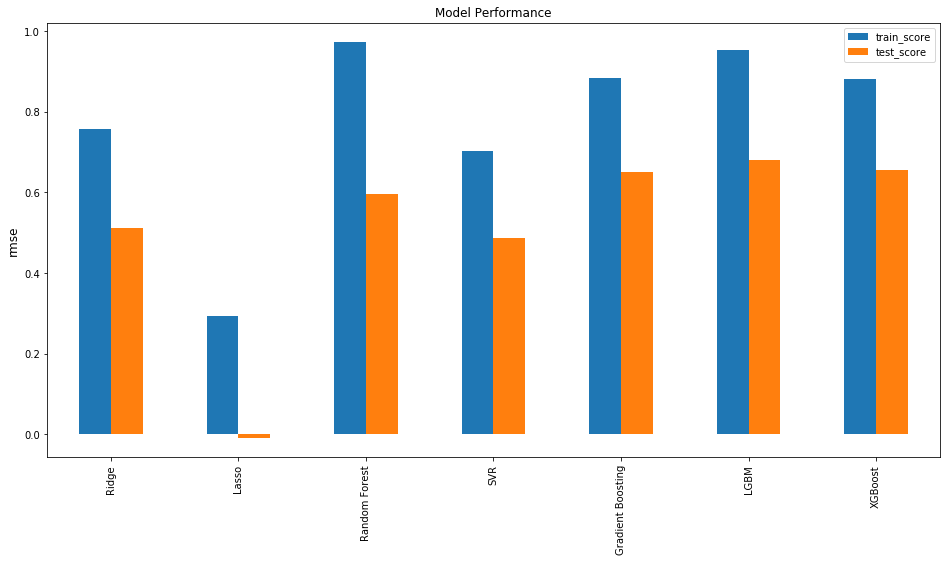

In [47]:
# Plot train and test scores
axis = model_summary[["train_score", "test_score"]].plot(kind="bar",
                    title="Model Performance", figsize=(16, 8))
axis.set_ylabel("rmse", fontsize="large")

The best model according to test scores is LGBM. Although XGBoost and Gradient Boosting Regressor perform quite well.

Text(0,0.5,'rmse')

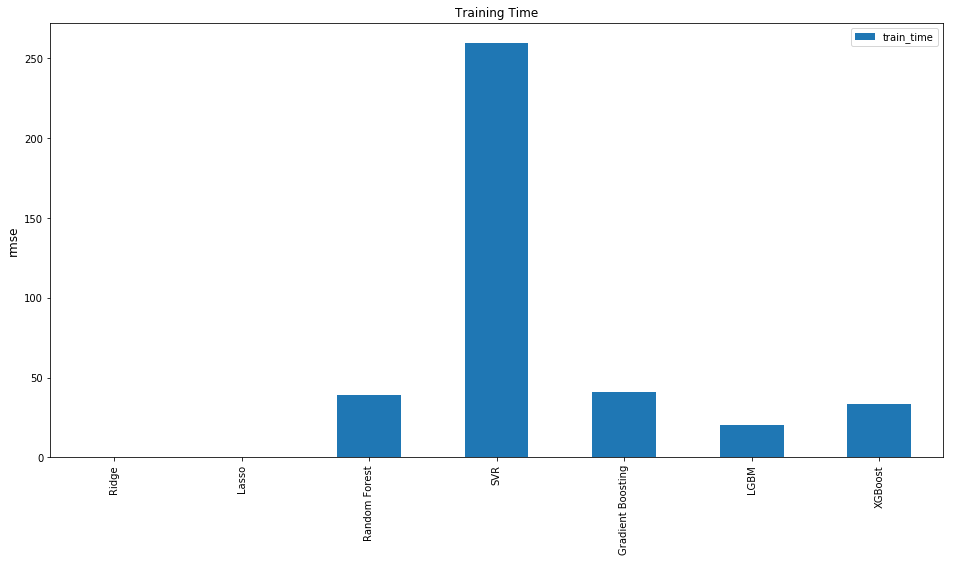

In [48]:
# Plot train and test scores
axis = model_summary[["train_time"]].plot(kind="bar", title="Training Time", figsize=(16, 8))
axis.set_ylabel("rmse", fontsize="large")

LGBM doesn't only have the best accuracy, but also has the least training time. Accuracy and training time are 2 important factors if we consider to deploy this model in a productive environment.

Text(0,0.5,'rmse')

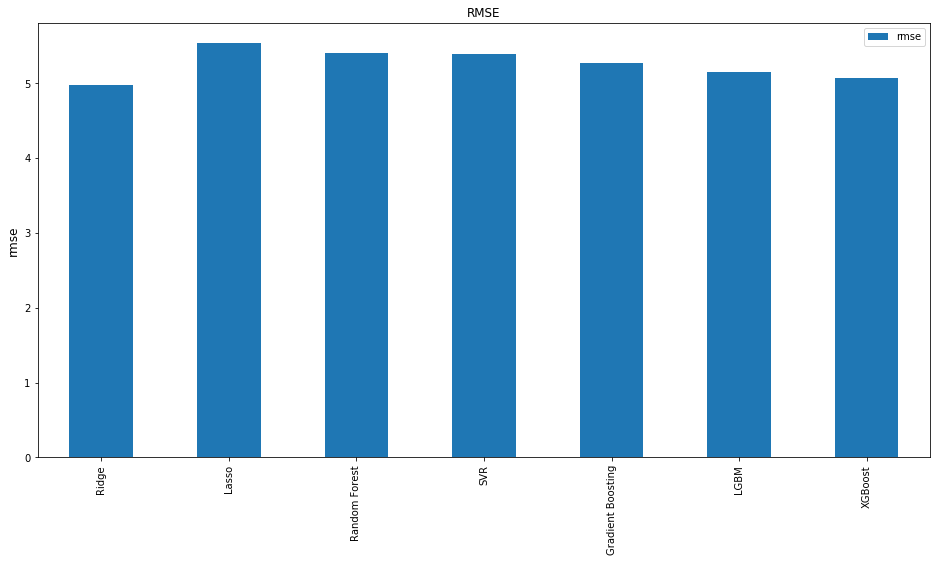

In [49]:
# Plot train and test scores
axis = model_summary[["rmse"]].plot(kind="bar", title="RMSE", figsize=(16, 8))
axis.set_ylabel("rmse", fontsize="large")

The RMSE Scores for all considered models are on a similar level and LGBM has a lower RMSE compared to most of the models.

__Best Model__ : LGBM Regression<br>
__Worst Model__: Lasso

### Hyper Parameter Tuning

The hyper parameters of LGBM Regressor can now be tuned using GridSearch CV for better fitting leading to higher accuracy of prediction.

<font color='blue'>Accuracy: 67.91%</font> <br>
<font color='blue'>Error rate (RMSE): 4.36</font> <br>

In [50]:
lgbm = LGBMRegressor(min_data=1)
lgbm_param = {'min_data': [1],'min_data_in_bin':[1],'num_leaves': [50,60],
              'min_data_in_leaf': [50,60,70],'max_depth': [30,50,70]}
tscv = TimeSeriesSplit(n_splits=70)
cv = tscv.split(X)
lgbm_cv = GridSearchCV(lgbm, lgbm_param, cv=cv, verbose=1)
lgbm_cv.fit(X,y)
lgbm_cv.best_params_
lgbm_result = lgbm_cv.cv_results_
print("Best LGBM Parameters :",lgbm_cv.best_params_)
print("LGB Score = ",lgbm_cv.best_score_)

Fitting 70 folds for each of 18 candidates, totalling 1260 fits


[Parallel(n_jobs=1)]: Done 1260 out of 1260 | elapsed:  7.2min finished


Best LGBM Parameters : {'max_depth': 30, 'min_data': 1, 'min_data_in_bin': 1, 'min_data_in_leaf': 60, 'num_leaves': 50}
LGB Score =  0.682210714016851


For tuning the model, I considered the following parameters:

i. num_leaves: maximum number of leaves in a tree (default=31)<br>
ii. min_data_inleaf: minimum number of examples for a leaf to be created<br>
iii. max_depth_ maximum depth that a tree can reach<br>

During execution of GridSearchCV with TimeSeriesSplit we encountered a problem with LightGBM (LightGBMError : Cannot construct Dataset since there are not useful features) due to the nature of the different input features. The actual_generation data which contains generation data of different energy sources is to a certain extent correlated. Since in our case all sources of energy generation are relevant, none of the features can be excluded. As a workaround for the error, the parameters _min_data_ and _min_data_in_bin_ have been set to 1. 

## Conclusion

The final model is a LightGBM Regression Model with a prediction accuracy of __68.22%__

### References

[1] http://colingorrie.github.io/outlier-detection.html (Tukey's Method for outlier detection) <br>
[2] https://medium.com/apteo/avoid-time-loops-with-cross-validation-aa595318543e (Look ahead bias) <br>
[3] https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/ (XGBoost)<br>
[4] https://smard.de<br>
[5] http://benalexkeen.com/feature-scaling-with-scikit-learn/ (MinMaxScaler)<br>
[6] [A Comparative Study of Different Machine LearningMethods for Electricity Prices Forecasting of an Electricity Market](https://www.researchgate.net/publication/282250672_A_Comparative_Study_of_Different_Machine_Learning_Methods_for_Electricity_Prices_Forecasting_of_an_Electricity_Market)<br>
[7] [Forecasting day ahead electricity prices in Europe](https://ac.els-cdn.com/S0306261917316999/1-s2.0-S0306261917316999-main.pdf?_tid=163a3320-4362-45ca-b979-300481ec5d1c&acdnat=1540837518_1c64917ccea34a96720342f96cfdaf08)<br>
[8] https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d<br>
[9] https://en.wikipedia.org/wiki/Coefficient_of_determination<br>
[10] http://blog.minitab.com/blog/adventures-in-statistics-2/multiple-regession-analysis-use-adjusted-r-squared-and-predicted-r-squared-to-include-the-correct-number-of-variables (R squared and adjusted r squared)<br>
[11] https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Ridge_Regression.pdf (Ridge Regression)<br>
[12] https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/ (Ridge Regression and Lasso Regression)<br>
[13] Boschetti,A and Massaron,L. (2018). Python Data Science Essentials Third edition, Birmingham: Packt Publishing
[14] https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation (TimeSeriesSplit)